<a href="https://colab.research.google.com/github/cerasole/EnvironmentalRadioactivity/blob/main/Notebooks/IV.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [7]:
!pip install iminuit

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 440.8/440.8 kB 6.0 MB/s eta 0:00:00


In [8]:
import numpy as np
import matplotlib.pyplot as plt

from iminuit import Minuit
from iminuit.cost import LeastSquares

plt.rc("font", size = 16)

In [9]:
V = np.array([
    1.198, 1.482, 2.30, 3.56, 4.41, 7.17, 17.64
])
V_err = np.array([
    0.001, 0.001, 0.01, 0.01, 0.01, 0.01, 0.01
])
I = np.array([
    120e-6, 150e-6, 230e-6, 360e-6, 450e-6, 700e-6, 1700e-6
])
I_err = np.array([
    10e-6, 10e-6, 10e-6, 10e-6, 10e-6, 100e-6, 100e-6
])

I_m = I*1e3
I_m_err = I_err*1e3

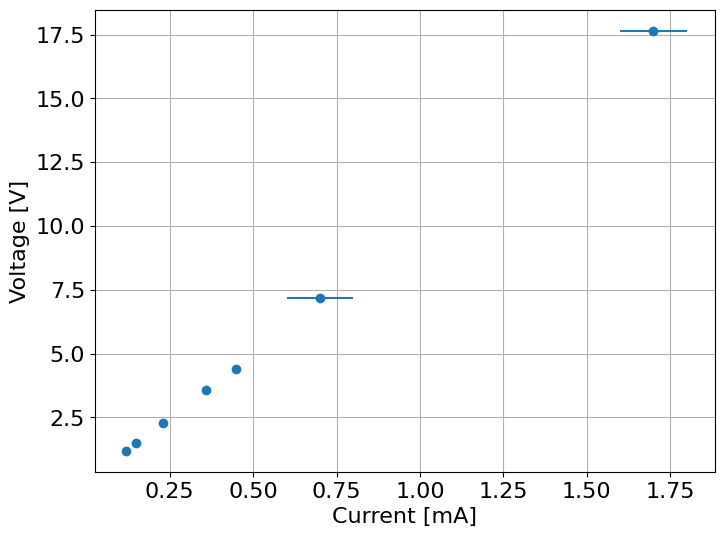

In [10]:
fig, ax = plt.subplots(figsize = (8, 6))
ax.errorbar(x = I_m, y = V, xerr = I_m_err, yerr = V_err, ls = "None", marker = "o", markersize = 6)
ax.set_xlabel("Current [mA]")
ax.set_ylabel("Voltage [V]")
ax.grid()

In [14]:
def linear(x, p0, p1):
  return p0+p1*x

lsq = LeastSquares(x=I, y=V, yerror=V_err, model = linear)
m = Minuit(lsq, p0=0, p1=100)
m.migrad()
m.hesse()

┌─────────────────────────────────────────────────────────────────────────┐
│                                Migrad                                   │
├──────────────────────────────────┬──────────────────────────────────────┤
│ FCN = 939.2 (χ²/ndof = 187.8)    │              Nfcn = 51               │
│ EDM = 1.89e-16 (Goal: 0.0002)    │                                      │
├──────────────────────────────────┼──────────────────────────────────────┤
│          Valid Minimum           │   Below EDM threshold (goal x 10)    │
├──────────────────────────────────┼──────────────────────────────────────┤
│      No parameters at limit      │           Below call limit           │
├──────────────────────────────────┼──────────────────────────────────────┤
│             Hesse ok             │         Covariance accurate          │
└──────────────────────────────────┴──────────────────────────────────────┘
┌───┬──────┬───────────┬───────────┬────────────┬────────────┬─────────┬─────────┬───────┐
│   │ Name │   Value   │ Hesse Err │ Minos Err- │ Minos Err+ │ Limit-  │ Limit+  │ Fixed │
├───┼──────┼───────────┼───────────┼────────────┼────────────┼─────────┼─────────┼───────┤
│ 0 │ p0   │  -0.0598  │  0.0011   │            │            │         │         │       │
│ 1 │ p1   │ 10.359e3  │  0.006e3  │            │            │         │         │       │
└───┴──────┴───────────┴───────────┴────────────┴────────────┴─────────┴─────────┴───────┘
┌────┬───────────────────────┐
│    │         p0         p1 │
├────┼───────────────────────┤
│ p0 │   1.24e-06 -5.0591e-3 │
│ p1 │ -5.0591e-3       34.1 │
└────┴───────────────────────┘

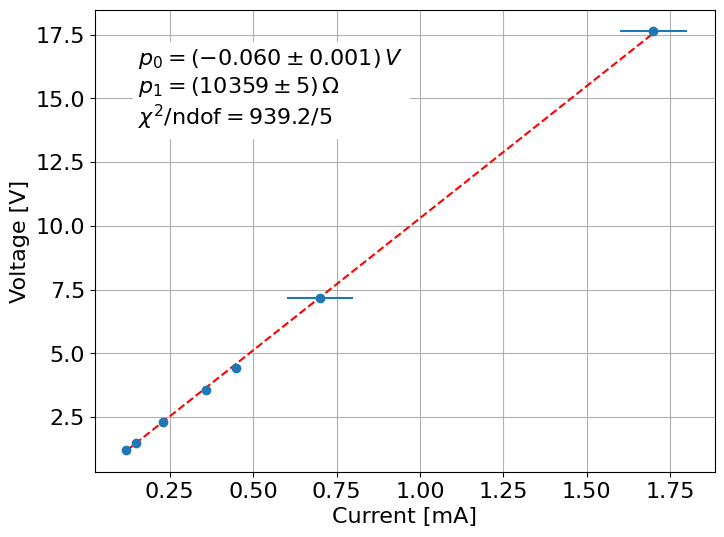

In [33]:
fig, ax = plt.subplots(figsize = (8, 6))
ax.errorbar(x = I_m, y = V, xerr = I_m_err, yerr = V_err, ls = "None", marker = "o", markersize = 6, label = "Data")

x = np.linspace(np.min(I), np.max(I), 100)
ax.plot(x*1e3, linear(x, *m.values), color = "red", ls = "dashed", label = "Fit")

ax.text(0.07, 0.75, "$p_0 = (%.3f \pm %.3f)\,V$\n$p_1 = (%d \pm %d)\,\Omega$\n$\chi^{2}/$ndof$ = %.1f/%d$"
        % (m.values[0], m.covariance[0, 0]**0.5, m.values[1], m.covariance[1, 1]**0.5, m.fval, m.ndof),
        transform = ax.transAxes,
        bbox = dict(facecolor = "white", edgecolor = "white"))

ax.set_xlabel("Current [mA]")
ax.set_ylabel("Voltage [V]")
ax.grid()

In [18]:
(m.values[0], m.covariance[0, 0]**0.5, m.values[1], m.covariance[1, 1]**0.5)

(-0.059767784083112896,
 0.001113114408520997,
 10359.145720658096,
 5.837042999103528)

In [34]:
p0_vals = np.linspace(-2, 2, 50)
p1_vals = np.linspace(1e3, 20e3, 50)
surf = np.zeros((50, 50))

for i in range(50):
  for j in range(50):
    surf[i][]